In [73]:
import numpy as np
from scipy import constants as const
from scipy.linalg import expm
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

In [43]:
T = 293.15
beta = 1/(const.Boltzmann* T)
g_h = 267.52218744 * (10**6)
g_c = 67.2828 * (10**6)
B = 1.5

J = 213

identity = np.identity(2)
sz = np.array([[1,0],[0,-1]]).reshape(2,2)

szi = np.kron(sz,identity)
isz = np.kron(identity, sz)
szsz = np.kron(sz,sz)

Omega1 = -1*g_h*B
Omega2 = -1*g_c*B
print(Omega1,Omega2)


-401283281.15999997 -100924200.0


In [47]:
H = (const.h/2)*((Omega1*szi) + (Omega2*isz) + (const.h*np.pi*J*szsz))



rho = expm(-1*H*beta)
rho = rho/rho.trace()

print(rho)

print((rho - np.identity(4)/4 )*10**5)

[[0.25001028 0.         0.         0.        ]
 [0.         0.25000615 0.         0.        ]
 [0.         0.         0.24999385 0.        ]
 [0.         0.         0.         0.24998972]]
[[ 1.0277297   0.          0.          0.        ]
 [ 0.          0.61465134  0.          0.        ]
 [ 0.          0.         -0.61466491  0.        ]
 [ 0.          0.          0.         -1.02771613]]


In [53]:
rho00 = rho[0][0]
rho11 = rho[1][1]
rho22 = rho[2][2]
rho33 = rho[3][3]
pbar = (rho11+rho22+rho33)/3
print(pbar)

rhobar = (rho00 - pbar)*np.diag([1,0,0,0]) + pbar*np.identity(4)
print(rhobar)
print(rho00 - pbar)


0.24999657423434432
[[0.25001028 0.         0.         0.        ]
 [0.         0.24999657 0.         0.        ]
 [0.         0.         0.24999657 0.        ]
 [0.         0.         0.         0.24999657]]
1.3703062622688611e-05


In [145]:
a = np.diag([5,3,-3,-5])
cnot = np.array([[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]])


near_cnot = np.array([[-1j,0,0,0],[0,1,0,0],[0,0,0,-1j],[0,0,-1,0]])
print(near_cnot)
print(near_cnot.conjugate().transpose())


print(cnot @ a @ cnot.transpose())


[[-0.-1.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -0.-1.j]
 [ 0.+0.j  0.+0.j -1.+0.j  0.+0.j]]
[[-0.+1.j  0.-0.j  0.-0.j  0.-0.j]
 [ 0.-0.j  1.-0.j  0.-0.j  0.-0.j]
 [ 0.-0.j  0.-0.j  0.-0.j -1.-0.j]
 [ 0.-0.j  0.-0.j -0.+1.j  0.-0.j]]
[[ 5  0  0  0]
 [ 0  3  0  0]
 [ 0  0 -5  0]
 [ 0  0  0 -3]]


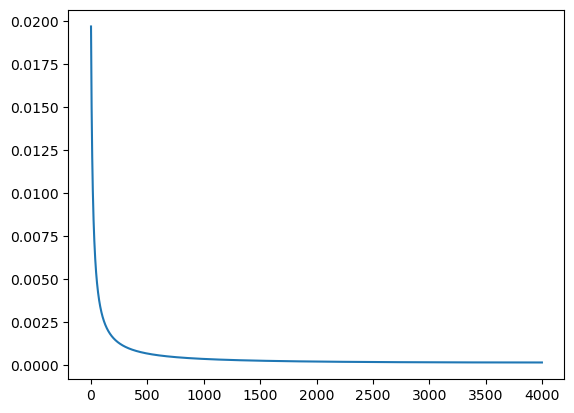

In [80]:
a = 0.25 + (5*10**(-4))
b = 0.25 + (3*10**(-4))
c = (0.25 - (5*10**(-4)))*1j
d = (0.25 - (3*10**(-4)))*(-1j)

def VP(t):
    return (a-c)*np.exp(-1j*J*t/2) + (b-d)*np.exp(-1j*J*t/2)

def VC(t):
    return (a-b)*np.exp(-1j*J*t/2) + (c-d)*np.exp(-1j*J*t/2)


# Number of sample points
N = 6000
# sample spacing
T = 1.0 / 8000.0
x = np.linspace(0.0, N*T, N, endpoint=False)
y = VP(x)

yf = fft(y)
xf = fftfreq(N, T)[:N//2]

#plt.plot(x,y)
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))

In [132]:
H = np.array([[1,1],[1,-1]])/np.sqrt(2)
CZ1 = expm(1j*np.pi*isz/4)#*const.hbar/2
CZ2 = expm(1j*np.pi*szi/4)#*const.hbar/2
CZ3 = expm(-1j*np.pi*szsz/4)#*const.hbar/2*const.hbar/2


IH = np.kron(np.identity(2), H)
HI = np.kron(H,np.identity(2))

print(IH)

[[ 0.70710678  0.70710678  0.          0.        ]
 [ 0.70710678 -0.70710678  0.         -0.        ]
 [ 0.          0.          0.70710678  0.70710678]
 [ 0.         -0.          0.70710678 -0.70710678]]


In [133]:
print(szsz)
print(CZ1)
print(CZ2)
print(CZ3/CZ3[0][0])
print(CZ1 @ CZ2)
print((CZ1 @ CZ2) @ CZ3)

[[ 1  0  0  0]
 [ 0 -1  0  0]
 [ 0  0 -1  0]
 [ 0  0  0  1]]
[[0.70710678+0.70710678j 0.        +0.j         0.        +0.j
  0.        +0.j        ]
 [0.        +0.j         0.70710678-0.70710678j 0.        +0.j
  0.        +0.j        ]
 [0.        +0.j         0.        +0.j         0.70710678+0.70710678j
  0.        +0.j        ]
 [0.        +0.j         0.        +0.j         0.        +0.j
  0.70710678-0.70710678j]]
[[0.70710678+0.70710678j 0.        +0.j         0.        +0.j
  0.        +0.j        ]
 [0.        +0.j         0.70710678+0.70710678j 0.        +0.j
  0.        +0.j        ]
 [0.        +0.j         0.        +0.j         0.70710678-0.70710678j
  0.        +0.j        ]
 [0.        +0.j         0.        +0.j         0.        +0.j
  0.70710678-0.70710678j]]
[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+1.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+1.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]]
[[0.+1.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j

In [136]:


CZ = (CZ3 @ CZ2 @ CZ1)
#CZ = CZ
CZ = np.round(CZ/CZ[0][0])
print(CZ)

CX = IH @ CZ 
print(CX @ IH)

[[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -1.+0.j]]
[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]]


In [114]:
print(IH @ isz@szi @ IH)

[[ 0.  1.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 0.  0.  0. -1.]
 [ 0.  0. -1.  0.]]
